### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read Image Function

In [2]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= int(img.readline())
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)  #Arry to store all image pixels
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

### Store/Write O/p Image Function

In [3]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(str(max))
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    plt.imshow(k,cmap='gray')
    img.close()

### Function used for padding

In [4]:
def add_padding(arr,row,col,k_row,k_col):
    r_pd_size= (k_row-1)//2
    c_pd_size= (k_col-1)//2
    n_row=row+r_pd_size*2
    n_col=col+c_pd_size*2
    new_arr= np.zeros((n_row,n_col),np.int64)
    for i in range(r_pd_size,row+r_pd_size):
        for j in range(c_pd_size,col+c_pd_size):
            new_arr[i,j]=arr[i-r_pd_size,j-c_pd_size]
    return new_arr,n_row,n_col

### Median filter

In [26]:
def median_filter(arr,row,col,f_size):

    padded_img,n_row,n_col= add_padding(arr,row,col,f_size,f_size)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            # neighbourhood= padded_img[max(0,i-f_size):min(row,i+f_size), max(0,j-f_size):min(col,j+f_size)]
            neighbourhood= padded_img[i:f_size+i, j:f_size+j]
            result[i,j]=int(np.median(neighbourhood))

    return result

### Min Filter

In [30]:
def min_filter(arr,row,col,f_size):

    padded_img,n_row,n_col= add_padding(arr,row,col,f_size,f_size)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            neighbourhood= padded_img[i:f_size+i, j:f_size+j]
            result[i,j]=np.min(neighbourhood)

    return result

### Max Filter

In [25]:
def max_filter(arr,row,col,f_size):

    padded_img,n_row,n_col= add_padding(arr,row,col,f_size,f_size)
    result= np.zeros((row,col),np.int64)  #Arry to store all image pixels after convolutation

    for i in range(row):
        for j in range(col):
            neighbourhood= padded_img[i:f_size+i, j:f_size+j]
            result[i,j]=np.max(neighbourhood)

    return result

### Main Function


Enter filter size=  3

Enter 1 to apply meadian filter
Enter 2 to apply min filter
Enter 3 to apply max filter
Enter your choice::  2


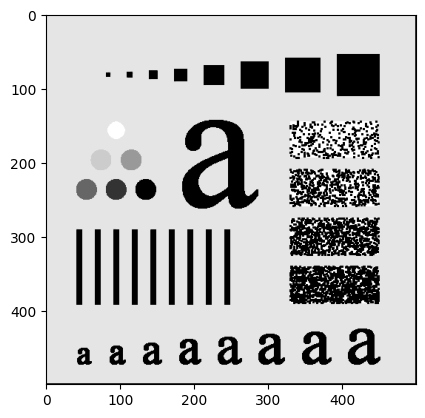

In [32]:
if __name__ == '__main__':
    
    k1,g1,c1,rc1,max1,col1,row1= Read_img("..\images\DIP3E_Original_Images_CH03\Fig0333(a)(test_pattern_blurring_orig).pgm")
    
    f= int(input("\nEnter filter size= "))
    ch=int(input("\nEnter 1 to apply meadian filter\nEnter 2 to apply min filter\nEnter 3 to apply max filter\nEnter your choice:: "))
    if ch==1:
        result=median_filter(k1,row1,col1,f)
        Write_img(f"outputs\\medianfilter_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    elif ch==2:
        result=min_filter(k1,row1,col1,f)
        Write_img(f"outputs\\minfilter_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    elif ch==3:
        result=max_filter(k1,row1,col1,f)
        Write_img(f"outputs\\maxfilter_img.pgm",result,g1,c1,rc1,max1,col1,row1)
    else :
        print("\nInvalid choice!")

### Tests

In [10]:
input_arr= arr=np.array([[1,8,8,0,7],[4,7,9,5,7],[5,4,6,8,6],[4,2,0,1,5],[0,1,0,2,0]])
row,col=input_arr.shape

In [27]:
#Median Filter Test
result= median_filter(input_arr,5,5,3)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[1 8 8 0 7]
 [4 7 9 5 7]
 [5 4 6 8 6]
 [4 2 0 1 5]
 [0 1 0 2 0]]
output
[[0 4 5 5 0]
 [4 6 7 7 5]
 [4 4 5 6 5]
 [1 2 2 2 1]
 [0 0 0 0 0]]


In [29]:
# Max Filter Test
result= max_filter(input_arr,5,5,3)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[1 8 8 0 7]
 [4 7 9 5 7]
 [5 4 6 8 6]
 [4 2 0 1 5]
 [0 1 0 2 0]]
output
[[8 9 9 9 7]
 [8 9 9 9 8]
 [7 9 9 9 8]
 [5 6 8 8 8]
 [4 4 2 5 5]]


In [31]:
# Min Filter Test
result= min_filter(input_arr,5,5,3)
print(f"input\n{input_arr}\noutput\n{result}")

input
[[1 8 8 0 7]
 [4 7 9 5 7]
 [5 4 6 8 6]
 [4 2 0 1 5]
 [0 1 0 2 0]]
output
[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [18]:
print(input_arr)

[[1 8 8 0 7]
 [4 7 9 5 7]
 [5 4 6 8 6]
 [4 2 0 1 5]
 [0 1 0 2 0]]


In [21]:
print(input_arr[0:3,0:3])
print(input_arr[0+1:3+1,0:3])
print(input_arr[0:3,0+1:3+1])

[[1 8 8]
 [4 7 9]
 [5 4 6]]
[[4 7 9]
 [5 4 6]
 [4 2 0]]
[[8 8 0]
 [7 9 5]
 [4 6 8]]
